In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import os

import sys
sys.path.append(os.path.abspath('../'))

from simulation.model import CommunicationNetwork

In [2]:
ACMBlue = '#00cfe6'
ACMYellow = '#ffd600'
ACMOrange = '#fc9200'
ACMRed = '#ff1924'
ACMLightBlue = '#82fcff'
ACMGreen = '#a5cf00'
ACMPurple = '#6200d9'
ACMDarkBlue = '#0055c9'

use_tex = False # if you have installed TeX and you would like to created pgf figures, please use True

if use_tex:
    plt.rcParams.update({
        "font.family": "serif",  # use serif/main font for text elements
        "text.usetex": True,     # use inline math for ticks
        "pgf.rcfonts": False     # don't setup fonts from rc parameters
        })

In [18]:
communication_network = model.CommunicationNetwork.from_json('../data/microsoft_code_review.json')
participants = communication_network.participants()
channels = communication_network.channels()

In [19]:
num_reviewers = pd.Series({channel: len(communication_network.channels(channel)) for channel in channels})
'{:.2%}'.format(num_reviewers[num_reviewers>2].size / num_reviewers.size)

'33.99%'

# Time-ignoring horizon

In [31]:
with open('../results/time_ignoring_upper_bound.json', 'r') as json_file:
    time_ignoring_upper_bound = pd.read_json(json_file, orient='index').iloc[:,0].rename('time_ignoring_horizon_cardinalities')

In [32]:
time_ignoring_upper_bound.describe()

count    37103.000000
mean     29660.009218
std      10203.647618
min          0.000000
25%      33172.000000
50%      33172.000000
75%      33172.000000
max      33172.000000
Name: time_ignoring_horizon_cardinalities, dtype: float64

Largest components

In [20]:
for s in sorted([len(cc & participants) for cc in nx.connected_components(communication_network._bipartite_graph)], reverse=True)[0:5]:
    print(s, '{:.2%}'.format(s/len(participants)))

33173 89.41%
108 0.29%
93 0.25%
66 0.18%
61 0.16%


# Time-respecting horizon

In [26]:
with open('../results/time_respecting_upper_bound.json', 'r') as json_file:
    time_respecting_upper_bound = pd.read_json(json_file, orient='index').iloc[:,0].rename('time_respecting_upper_bound')

In [27]:
time_respecting_upper_bound.describe()

count    37103.000000
mean     10908.352317
std       9286.130779
min          1.000000
25%        202.000000
50%      11653.000000
75%      19922.000000
max      26217.000000
Name: time_respecting_upper_bound, dtype: float64

In [29]:
'{:.2%}'.format(26216/len(participants))

'70.66%'

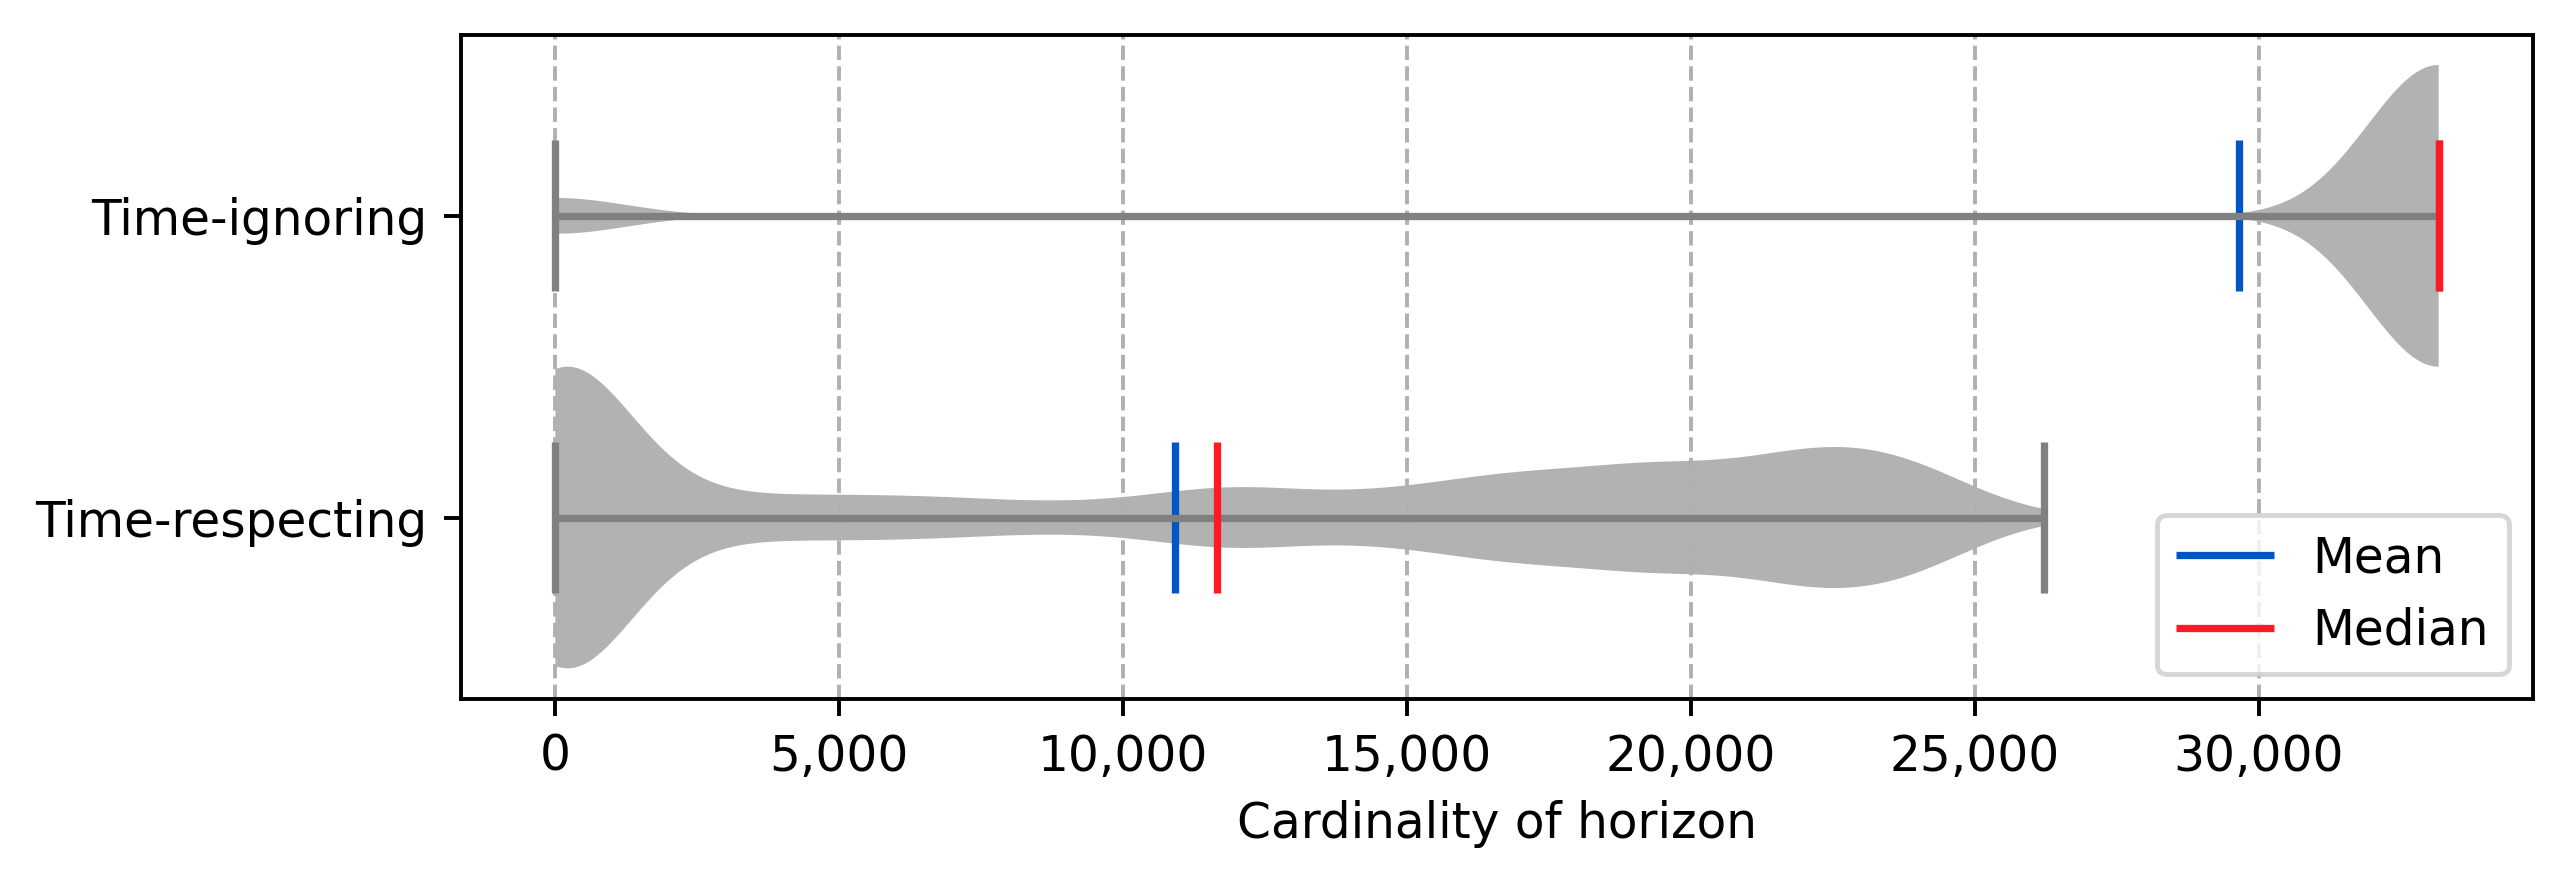

In [35]:
fig, ax = plt.subplots(figsize=(7.22, 7.22/3), dpi=350, constrained_layout=True)

violinplot = ax.violinplot([time_respecting_upper_bound, time_ignoring_upper_bound], vert=False, showmeans=True, showmedians=True, points=1000, widths=1, showextrema=True);

for i in violinplot['bodies']:
    i.set_facecolor('black')

violinplot['cmeans'].set_color(ACMDarkBlue)
violinplot['cmeans'].set_label('Mean')

violinplot['cmedians'].set_color(ACMRed)
violinplot['cmedians'].set_label('Median')

for k in ['cmaxes', 'cmins', 'cbars']:
    violinplot[k].set_color('gray')

yticklabels = ['Time-respecting', 'Time-ignoring']
ax.set_yticks([1, 2])
ax.set_yticklabels(yticklabels)
ax.set_xlabel('Reachable participants')
ax.xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

ax.grid(which='both', axis='x', linestyle='--')
plt.legend(loc='lower right');

if use_tex:
    plt.savefig('../plots/dist.pgf', dpi=1000, bbox_inches='tight');
plt.savefig('../plots/dist.png', dpi=1000, bbox_inches='tight');

# Difference between both models

In [33]:
diff = time_ignoring_upper_bound - time_respecting_upper_bound

In [34]:
diff.describe()

count    37103.000000
mean     18751.656901
std      10667.821208
min         -1.000000
25%      10911.000000
50%      16821.000000
75%      30536.000000
max      33170.000000
dtype: float64

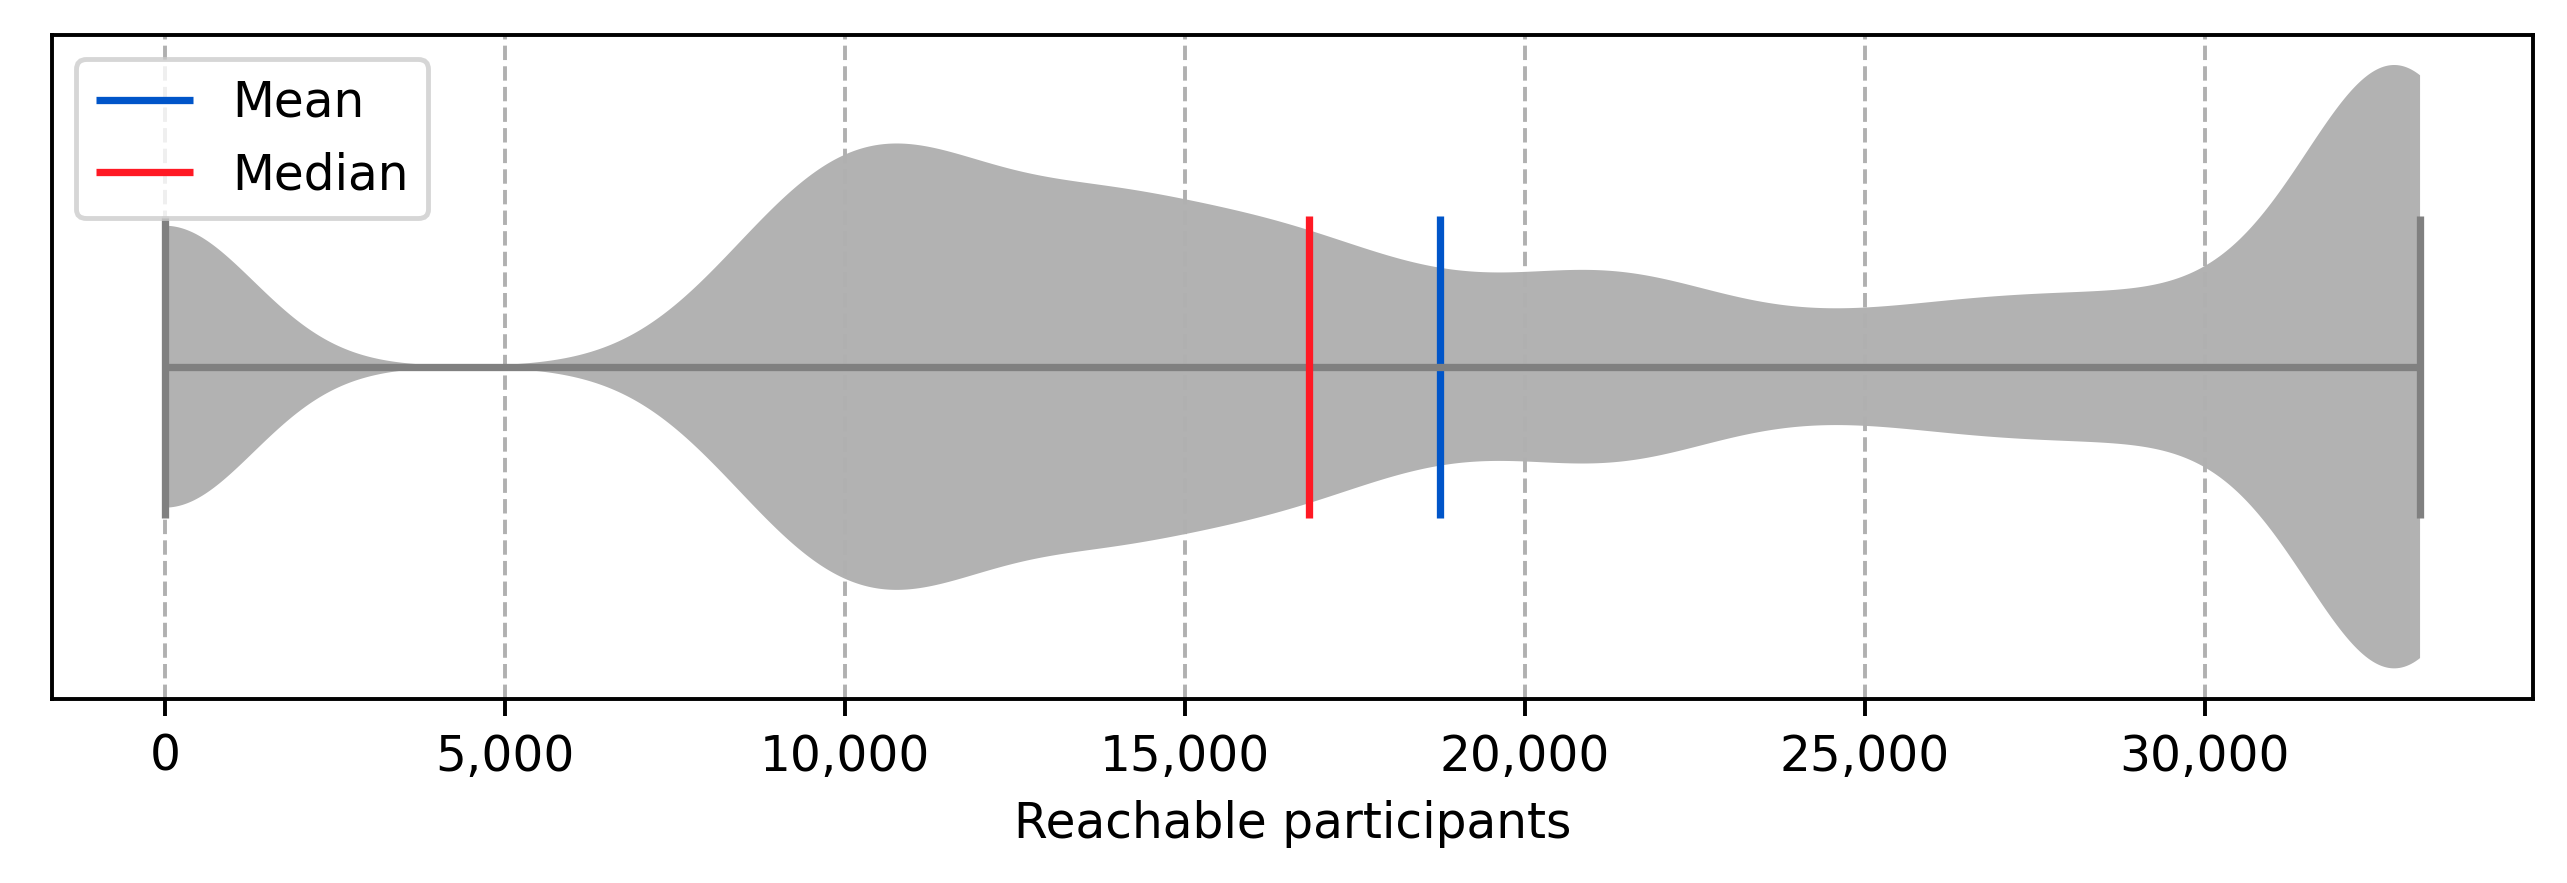

In [37]:
fig, ax = plt.subplots(figsize=(7.22, 7.22/3), dpi=350, constrained_layout=True)

violinplot = ax.violinplot(diff, vert=False, showmeans=True, showmedians=True, points=1000, widths=1, showextrema=True);

for i in violinplot['bodies']:
    i.set_facecolor('black')

violinplot['cmeans'].set_color(ACMDarkBlue)
violinplot['cmeans'].set_label('Mean')

violinplot['cmedians'].set_color(ACMRed)
violinplot['cmedians'].set_label('Median')

for k in ['cmaxes', 'cmins', 'cbars']:
    violinplot[k].set_color('gray')

ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xlabel('Reachable participants')
ax.xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

ax.grid(which='both', axis='x', linestyle='--')
plt.legend(loc='upper left');

if use_tex:
    plt.savefig('../plots/diff.pgf', dpi=1000, bbox_inches='tight');
plt.savefig('../plots/diff.png', dpi=1000, bbox_inches='tight');